
# Project: TMDB Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Linear_Regression_model">Linear Regression model</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we'll be analyzing data in TMDB, and in particular we'll be interested in finding tends among the relations between different features in movies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

> We need to take a look at our dataset, its data types and check whether it has missing values.

### General Properties

In [ ]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We have 10866 movies with 21 columns

In [ ]:
df.shape

(10866, 21)

lets check some statistics

In [ ]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



Looks like the data has missing values in imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Before cleaning we can drop the columns we don't need.

In [ ]:
df.drop(columns=['id','imdb_id','homepage','tagline','overview'], inplace=True)
df

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Now the data has missing values in director, keywords, genres and production_companies columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

Statistics after dropping.

In [ ]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


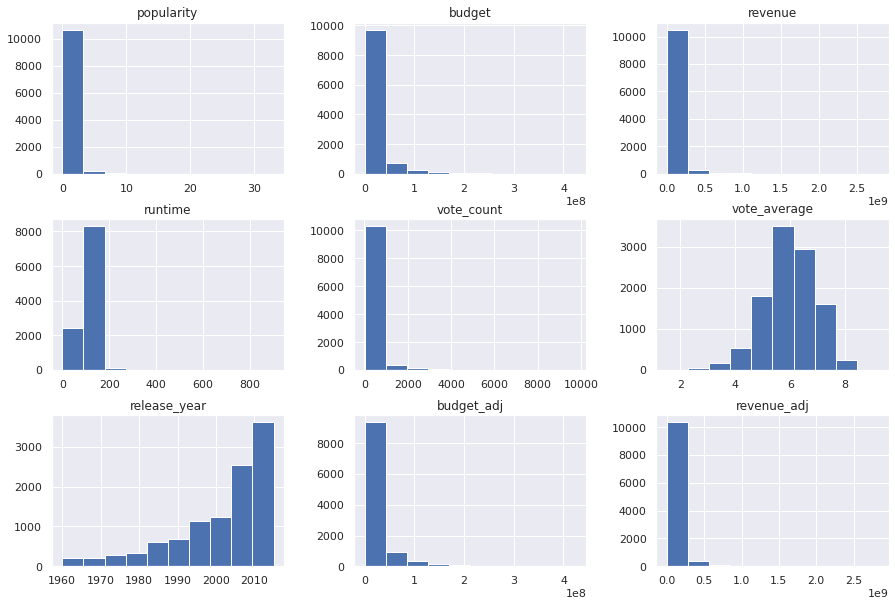

In [ ]:
df.hist(figsize=(15,10));

In [ ]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000



### Data Cleaning 
>We need to use something like "mean" to replace the null numerical values and make accurate prediction, and for the string values we can delete or drop them

>But there is no null numerical values so we'll just drop the string values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8667 non-null   float64
 1   budget                8667 non-null   int64  
 2   revenue               8667 non-null   int64  
 3   original_title        8667 non-null   object 
 4   cast                  8667 non-null   object 
 5   director              8667 non-null   object 
 6   keywords              8667 non-null   object 
 7   runtime               8667 non-null   int64  
 8   genres                8667 non-null   object 
 9   production_companies  8667 non-null   object 
 10  release_date          8667 non-null   object 
 11  vote_count            8667 non-null   int64  
 12  vote_average          8667 non-null   float64
 13  release_year          8667 non-null   int64  
 14  budget_adj            8667 non-null   float64
 15  revenue_adj         

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1

### Does a higher Popularity means higher Revenue?
>To answer this question we can make 2 variables for movies that have high and low popularity and compare the mean of revenue in each of them.

In [ ]:
m=df.popularity.mean()
low_pop=df.query('popularity<{}'.format(m))
high_pop=df.query('popularity>={}'.format(m))

In [ ]:
low_pop.revenue.mean()

11596611.356805984

In [ ]:
high_pop.revenue.mean()

141176358.1799047

Function for plot characteristics to avoid repetition:

In [ ]:
def plot_characteristics(figsize_x, figsize_y, plot_title, title_size, plot_xlabel, plot_ylabel, xlabel_and_ylabel_size):
    plt.subplots(figsize=(figsize_x,figsize_y))
    plt.title(plot_title, fontsize=title_size)
    plt.xlabel(plot_xlabel, fontsize=xlabel_and_ylabel_size)
    plt.ylabel(plot_ylabel, fontsize=xlabel_and_ylabel_size)

Overall it seems that more popular movies have higher revenue.

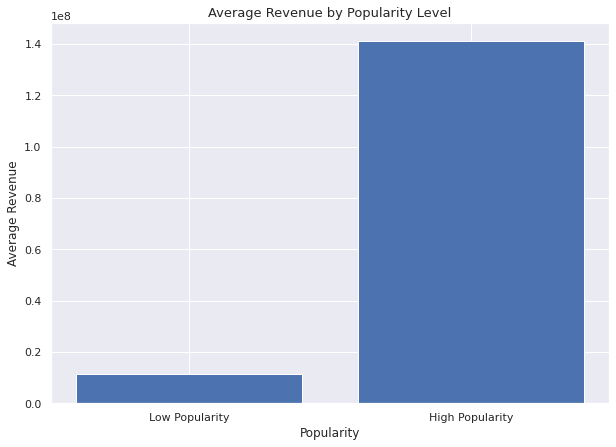

In [ ]:
plot_characteristics(10, 7, 'Average Revenue by Popularity Level',13, 'Popularity', 'Average Revenue',12)
plt.bar([1,2],[low_pop.revenue.mean(),high_pop.revenue.mean()],tick_label=['Low Popularity','High Popularity']);

According to the scatter plot below there is a positive correlation between popularity and revenue.

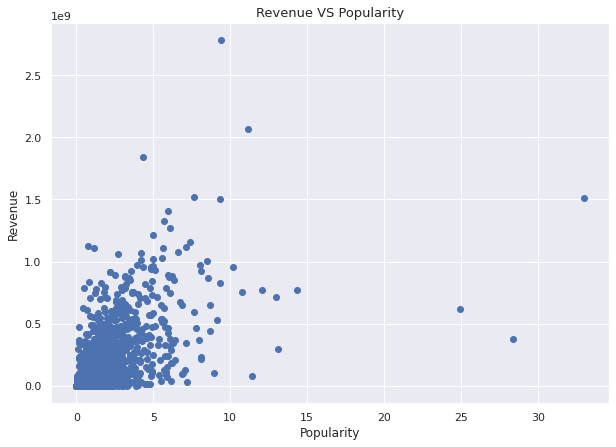

In [ ]:
plot_characteristics(10, 7, 'Revenue VS Popularity',13, 'Popularity', 'Revenue',12)
plt.scatter(x=df.popularity,y=df.revenue);

### Research Question 2  
### Is there a relation between Release Year and Revenue?

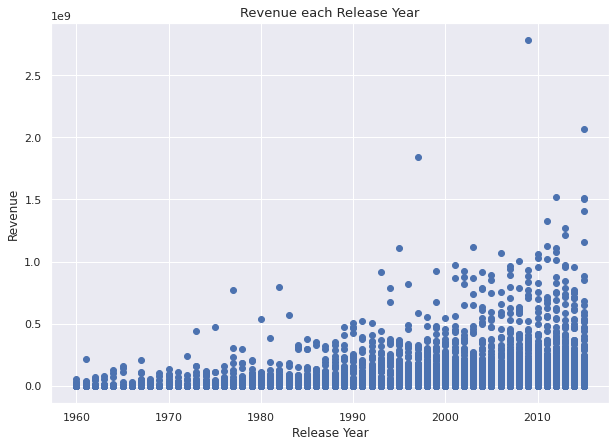

In [ ]:
plot_characteristics(10, 7, 'Revenue each Release Year',13, 'Release Year', 'Revenue',12)
plt.scatter(df.release_year,df.revenue);

To make it more clear we can get the mean of Revenue each Release Year and graph it in a line plot. Overall the new movies have higher Revenue.

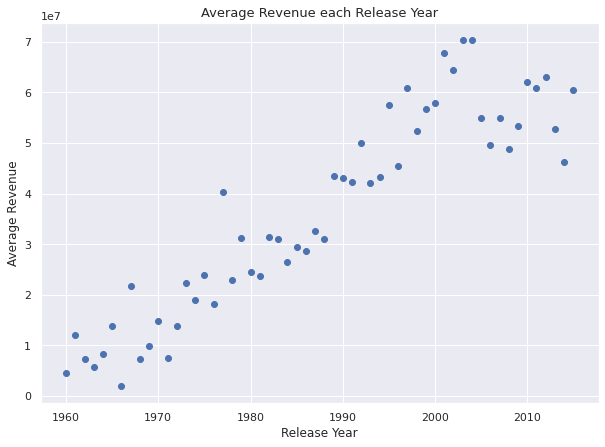

In [ ]:
plot_characteristics(10, 7, 'Average Revenue each Release Year',13, 'Release Year', 'Average Revenue',12)
year_and_revenue_groupby=df.groupby(df.release_year, as_index=False)['revenue'].mean()
plt.scatter(x=year_and_revenue_groupby.release_year, y=year_and_revenue_groupby.revenue);

### Research Question 3

### Is there a relation between Budget and Revenue?

>According to the scatter plot below, the movies with high Budget are most likely getting higher Revenue.

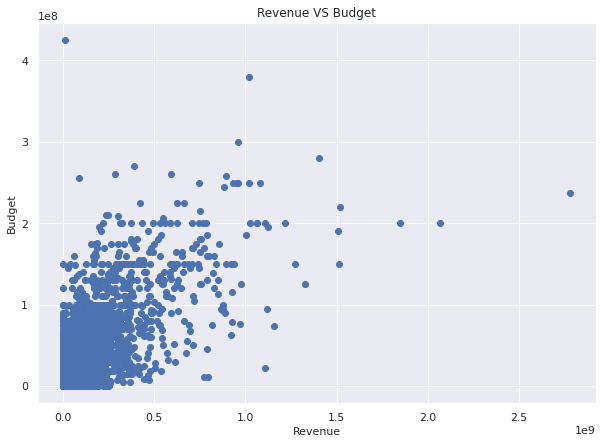

In [ ]:
plot_characteristics(10, 7, 'Revenue VS Budget',12, 'Revenue', 'Budget',11)
plt.scatter(x=df.revenue,y=df.budget);

### Research Question 4

### Is there a relation between Rating and Revenue?
> As we can see from the scatter plot below, there is no relation between Rating and Revenue.

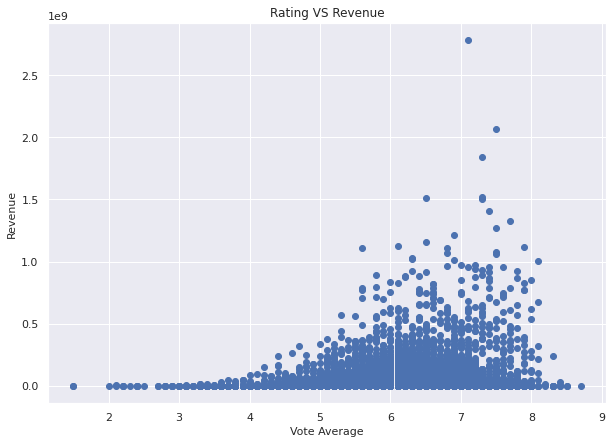

In [ ]:
plot_characteristics(10, 7, 'Rating VS Revenue', 12, 'Vote Average', 'Revenue',11)
plt.scatter(x=df.vote_average,y=df.revenue);

### Research Question 5
### Is there a correlation between Popularity and Budget?
> There is a strong correlation between Popularity and Budget.

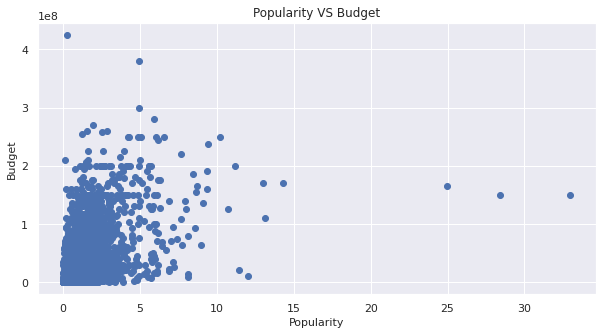

In [ ]:
plot_characteristics(10,5,'Popularity VS Budget',12,'Popularity','Budget',11)
plt.scatter(x=df.popularity, y=df.budget);

### Research Question 6
### What is the average runtime in profitable movies?
> The movies that have a revenue of around 40 million dollars or more are profitable.

> The average runtime for profitable movies is 113 minute.

In [ ]:
revenue_mean=df.revenue.mean()
profitable_movies_df=df.query('revenue>={}'.format(revenue_mean))
revenue_mean

49243063.704857506

In [ ]:
profitable_movies_df.runtime.mean()

113.08752620545073

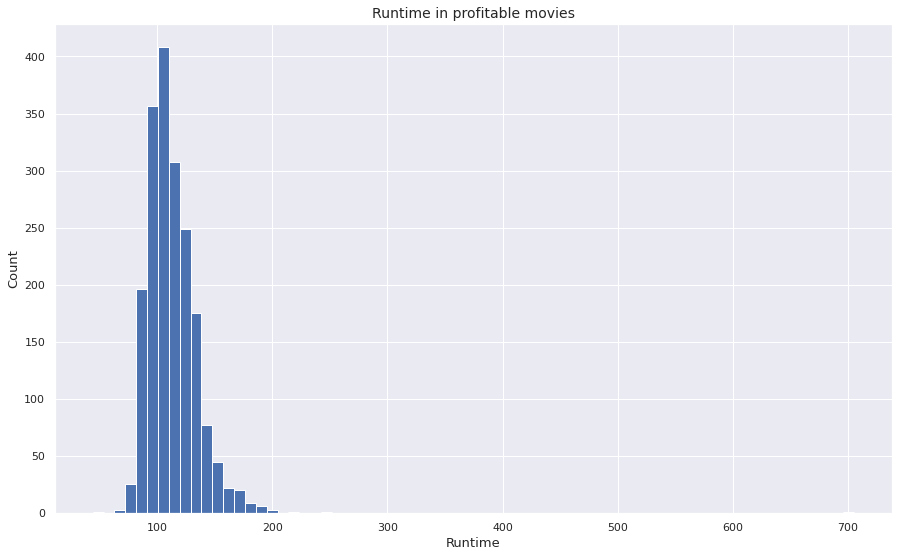

In [ ]:
plot_characteristics(15, 9, "Runtime in profitable movies",14, "Runtime","Count",13)
plt.hist(x=profitable_movies_df.runtime, bins=70);

### Research Question 7
### What is the average Budget for profitable movies?
> The average budget for profitable movies is around 52 million dollars.

In [ ]:
profitable_movies_df.budget.mean()

55879040.95387841

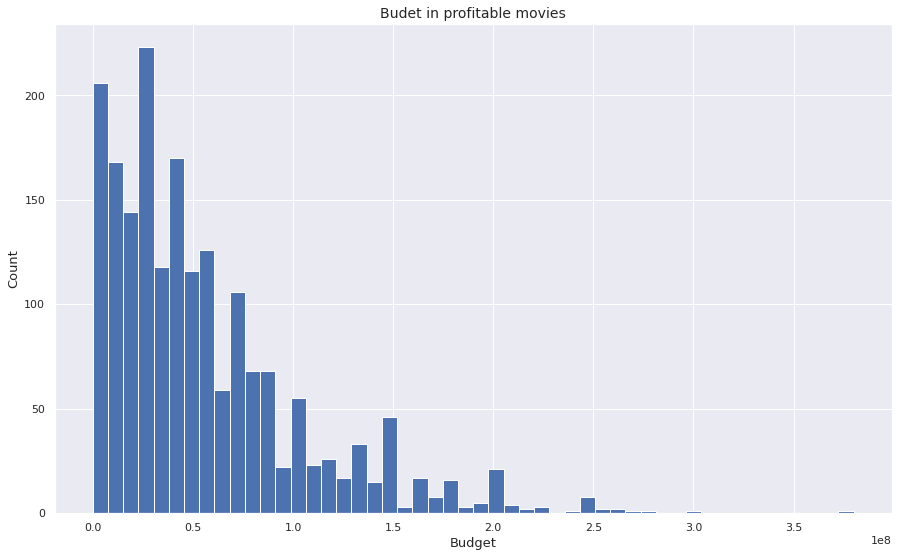

In [ ]:
plot_characteristics(15, 9, "Budet in profitable movies", 14, "Budget","Count", 13)
plt.hist(x=profitable_movies_df.budget, bins=50);

### Research Question 8
### What are the most frequent casts?
> The most frequent casts in profitable movies are Bruce Willis, Tom Cruise, Tom Hanks, Robert De Niro and Brad Pitt       

In [ ]:
# Function to get the most frequent elements of a column from the profitable_movies_df
def frequency_in_profitable_movies(column):
    data = pd.Series(profitable_movies_df[column]).str.cat(sep='|')
    data = pd.Series(data.split('|'))
    return data.value_counts(ascending=False).astype(int)

In [ ]:
frequency_in_profitable_movies('cast').head()

Bruce Willis      32
Tom Cruise        30
Tom Hanks         29
Robert De Niro    28
Brad Pitt         27
dtype: int64

### Research Question 9
### What are the most frequent directors?
> The most frequent directors in profitable movies are Steven Spielberg, Clint Eastwood, Ron Howard, Tim Burton and Ridley Scott

In [ ]:
frequency_in_profitable_movies('director').head()

Steven Spielberg    25
Clint Eastwood      17
Ron Howard          16
Tim Burton          14
Robert Zemeckis     13
dtype: int64

### Research Question 10
### What are the most frequent genres?
> The most frequent genres in profitable movies are Drama, Comedy, Action, Thriller and Adventure    

In [ ]:
frequency_in_profitable_movies('genres').head()

Drama        728
Comedy       719
Action       654
Thriller     577
Adventure    510
dtype: int64

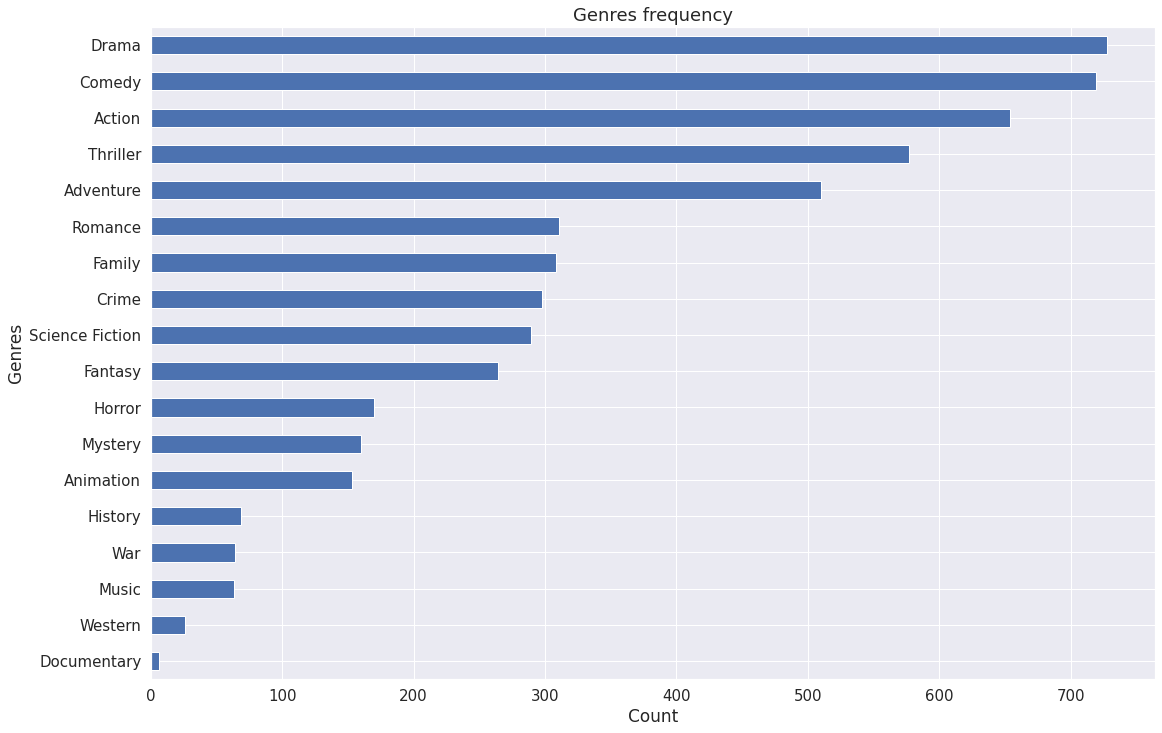

In [ ]:
plot_characteristics(18, 12, "Genres frequency", 18, "Count","Genres", 17)
frequency_in_profitable_movies('genres').sort_values(ascending=True).plot.barh(fontsize=15);

### Research Question 11
### What are the most frequent keywords?
> The most frequent keywords in profitable movies are "based on novel", "duringcreditsstinger", "dystopia", "new york" and "london"

In [ ]:
frequency_in_profitable_movies('keywords').head()

based on novel          90
duringcreditsstinger    61
dystopia                54
new york                44
london                  43
dtype: int64

### Research Question 12
### What are the average Revenue for profitable movies?
> The average revenue for profitable movies is around 202 million dollars.

In [ ]:
profitable_movies_df.revenue.mean()

201607514.1100629

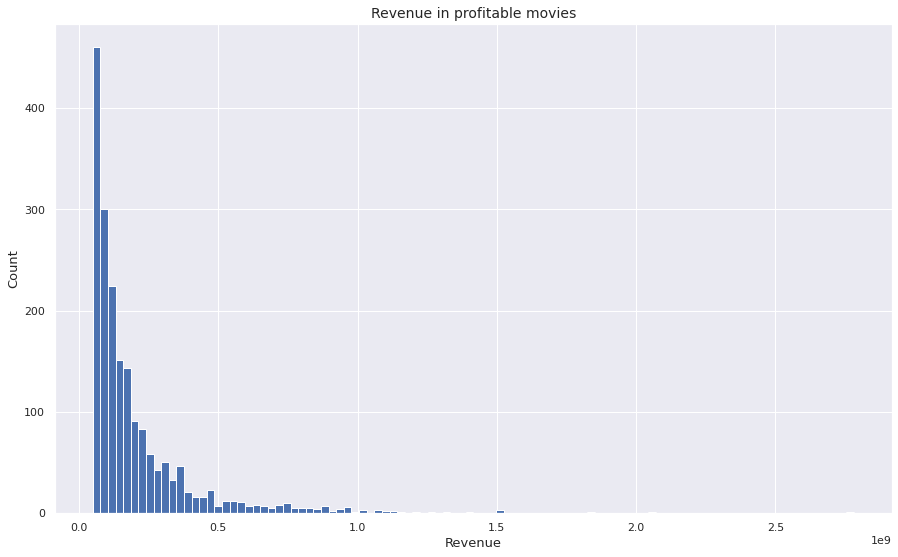

In [ ]:
plot_characteristics(15, 9, "Revenue in profitable movies",14, "Revenue","Count",13)
plt.hist(x=profitable_movies_df.revenue, bins=100);

<a id='conclusions'></a>
## Conclusions

- More popular movies have higher Revenue.

- New movies have higher Revenue.

- The movies with high Budget are most likely getting higher Revenue.

- There is no relation between Rating and Revenue.

- A movies with higher Budget most likely get higher Popularity.

- The successful criteria for a movie:
    - Average runtime must be 113 minutes.
    - Average budget must be around 52 million dollars.
    - At least one of those must be in the cast: Bruce Willis - Tom Cruise - Tom Hanks - Robert De Niro - Brad Pitt.
    - One of those must be the director: Steven Spielberg - Clint Eastwood - Ron Howard - Tim Burton - Ridley Scott.
    - The genres must contain at least one of those: Drama - Comedy - Action - Thriller - Adventure.
    - The movie must contain at least one of those keywords: "based on novel" - "duringcreditsstinger" - "dystopia" - "new york" - "london"
- By doing all of the above the movie most likely will be profitable and can earn around 202 million dollars.
    

### Limitation

- Missing values in the data affect the visualization results slightly.

<a id='Linear_Regression_model'></a>
## Linear Regression model

> A model to predict the revenue based on multiple variables.

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['popularity','budget','vote_average','release_year','runtime','budget_adj','vote_count']]

y = df['revenue']
y = np.array(y)

X_features = ['popularity','budget','vote_average','release_year','runtime','budget_adj','vote_count']

Cross validation : Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.

Splitting the data into training set, cross validation set and test sets. Test set takes 20% of the data and cross validation takes 20%.

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5)

Now we need to use the cross validation set to tune the degree of polynomial by testing the mean squared error in each degree from 1 to 5 and choosing the model that has the least mean squared error.

In [ ]:
max_degree = 5

err_cv = np.zeros(max_degree)

for i in range(max_degree):
    degree = i + 1 
    poly_train = PolynomialFeatures(degree, include_bias=False).fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(poly_train, y_train)
    poly_cv = PolynomialFeatures(degree, include_bias=False).fit_transform(X_cv)
    yhat = lr.predict(poly_cv)
    err_cv[degree-1] = mean_squared_error(y_cv, yhat)

optimal_degree = np.argmin(err_cv) + 1

print(f'The optimal degree is {optimal_degree}')

The optimal degree is 2


In [ ]:
poly_train = PolynomialFeatures(optimal_degree, include_bias=False).fit_transform(X_train)
model = LinearRegression()
model.fit(poly_train, y_train)

LinearRegression()

In [ ]:
poly_test = PolynomialFeatures(optimal_degree, include_bias=False).fit_transform(X_test)
poly_test = np.array(poly_test) # For the plot.
print(f"Train R-Squared score: {model.score(poly_train, y_train)}")
print(f"Test R-Squared score: {model.score(poly_test, y_test)}")

Train R-Squared score: 0.7849647625935562
Test R-Squared score: 0.7309341810359351


No overfitting.


In [ ]:
if optimal_degree == 1:
    y_pred=model.predict(poly_test)
    fig,ax=plt.subplots(1,7,figsize=(20,5),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X_test[:,i],y_test, label = 'target')
        ax[i].set_xlabel(X_features[i])
        ax[i].scatter(X_test[:,i], y_pred, color='orange', label = 'predict')
    ax[0].set_ylabel("Revenue"); ax[0].legend();
    fig.suptitle("target versus prediction in the test set");